In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [73]:
#definind the start and end time

start = '2010-01-01'
end = '2022-03-31'
df = data.DataReader('AAPL','yahoo',start,end) #stock ticker entered
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544685
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [74]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-11,169.029999,165.500000,168.710007,165.750000,72246700.0,165.750000
2022-04-12,169.869995,166.639999,168.020004,167.660004,79265200.0,167.660004
2022-04-13,171.039993,166.770004,167.389999,170.399994,70618900.0,170.399994
2022-04-14,171.270004,165.039993,170.619995,165.289993,75237500.0,165.289993
2022-04-18,166.598404,163.690002,163.919998,165.128906,47850914.0,165.128906


In [4]:
#reseting the index

df = df.reset_index()
df.head()   #we don't want the date so we can just remove them

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444379
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
#no need of date column and adj. close column so just drop them
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


In [6]:
#our based on close column we can amke an app for open 
#low high volmune uo to us

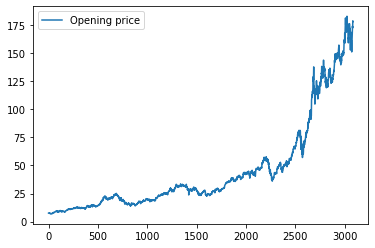

In [7]:
#workin on the close column
plt.plot(df.Open,label = 'Opening price')
plt.legend()                                 #graph showing the closing price of AAPL stack

In [8]:
#how can we create the moving avergaes

#suppos we want 100 days moving avergae
# then for the 100 days moving average it will calculate the mean of 100 days 
# moving avergae for the 101th index

In [9]:
#for thet we need to create a rollijg function

ma100 = df.Open.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3079    165.9852
3080    166.2203
3081    166.4833
3082    166.7530
3083    167.0125
Name: Open, Length: 3084, dtype: float64

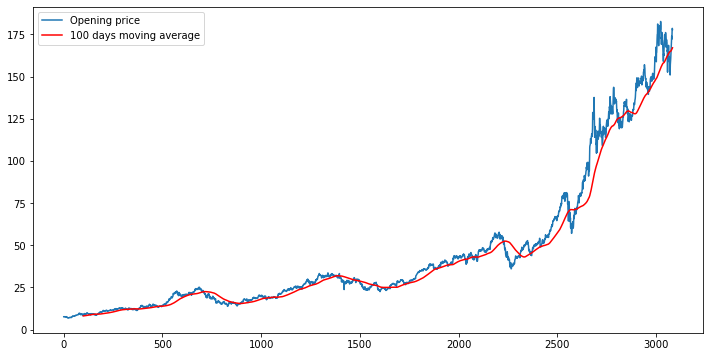

In [10]:
#plot moving average in the function
plt.figure(figsize = (12,6))
plt.plot(df.Open,label = 'Opening price')
plt.plot(ma100,'r',label = '100 days moving average')
plt.legend()
#below graph with 100 days rolling average

In [11]:
#for 200 days moving avegare
ma200 = df.Open.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3079    155.26655
3080    155.49475
3081    155.73910
3082    155.98215
3083    156.21950
Name: Open, Length: 3084, dtype: float64

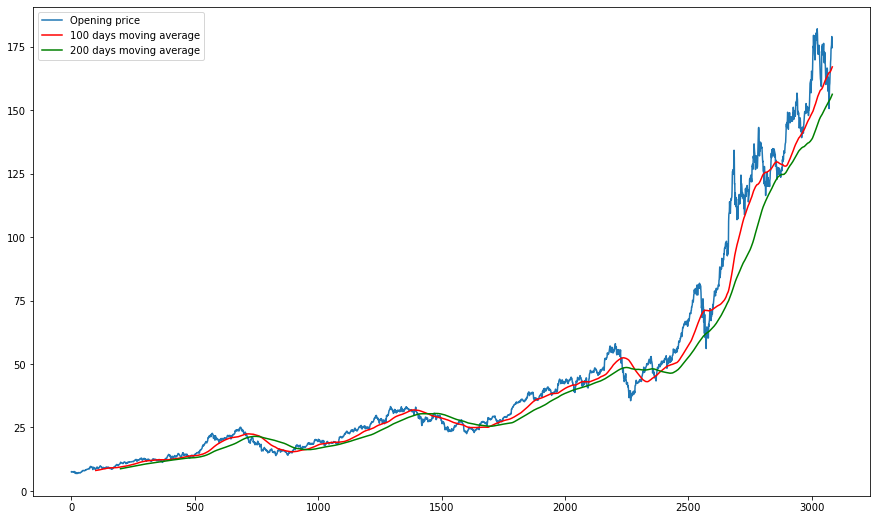

In [12]:
#plot moving average in the function
plt.figure(figsize = (15,9))
plt.plot(df.Close,label = 'Opening price')
plt.plot(ma100,'r',label = '100 days moving average')
plt.plot(ma200,'g',label = '200 days moving average')
plt.legend()

#below graph with 200 days rolling average

In [13]:
df.shape #how many rows and colums that we have

(3084, 5)

In [14]:
#splitting data into trainning and testing

In [15]:
data_training = pd.DataFrame(df['Open'][0:int(len(df)*0.70)])  
#we will use 70% of total data-set as training


#for datatesting

data_testing = pd.DataFrame(df['Open'][int(len(df)*0.70):int(len(df))])
#rest 30% data will be test_data

print("Trainning Data-Shape: ",data_training.shape)
print("Testing Data-Shape: ",data_testing.shape)

Trainning Data-Shape:  (2158, 1)
Testing Data-Shape:  (926, 1)


In [16]:
#data trainning obersevation

data_training.head()

,Open
0,7.611786
1,7.622500
2,7.664286
3,7.656429
4,7.562500


In [17]:
#data testing obersevation
data_testing.head()

,Open
2158,47.974998
2159,47.575001
2160,49.782501
2161,50.145000
2162,51.757500


In [18]:
#now we need to scale our data

#for stat LSTM we need to scale down oue data betwn 0-1 for taht we need 
#to import min-max scalar form sklearn data pre-processing

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

scaler

MinMaxScaler()

In [20]:
#now we can fit our data in minmax scalar

#fititng the training data in minmax scaler

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01770486],
       [0.0179607 ],
       [0.01895853],
       ...,
       [0.98847815],
       [0.99773143],
       [1.        ]])

In [21]:
#divide uthe data in xtrain and ytrain

In [22]:
x_train = []
y_train = []

data_training_array.shape

(2158, 1)

In [23]:
#insert values in xtrain and ytrain

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
    
x_train

[array([[0.01770486],
        [0.0179607 ],
        [0.01895853],
        [0.0187709 ],
        [0.01652794],
        [0.01529132],
        [0.01742342],
        [0.01434467],
        [0.01321896],
        [0.01512931],
        [0.01582861],
        [0.01361125],
        [0.01922289],
        [0.01680938],
        [0.01228936],
        [0.00864775],
        [0.0115815 ],
        [0.01234905],
        [0.01071162],
        [0.0074282 ],
        [0.        ],
        [0.00301905],
        [0.00238794],
        [0.00371835],
        [0.00022174],
        [0.00283142],
        [0.00345398],
        [0.00300197],
        [0.00214062],
        [0.00489527],
        [0.00816163],
        [0.01008051],
        [0.00789724],
        [0.00809342],
        [0.00850278],
        [0.00650713],
        [0.00499761],
        [0.00427271],
        [0.00853688],
        [0.01141093],
        [0.01497578],
        [0.01413148],
        [0.01442145],
        [0.01924849],
        [0.02357236],
        [0

In [24]:
y_train

[0.04921710649942507,
 0.04966056796886209,
 0.05715700935168985,
 0.0574128428723418,
 0.06154908380958338,
 0.062094887796539516,
 0.056150641262751794,
 0.056218869607764566,
 0.0519120578079911,
 0.05040253983430282,
 0.044748240993673416,
 0.04763936018072404,
 0.054231775992132886,
 0.05395886261208188,
 0.05861533329347274,
 0.06671726707856987,
 0.06812444253473904,
 0.07276385612987671,
 0.06804769703317262,
 0.07011155892351659,
 0.06705838603048775,
 0.06625674852287966,
 0.06358734868397461,
 0.06119088499826644,
 0.0548713825669086,
 0.052816060606264176,
 0.04956674260789662,
 0.05000170969392584,
 0.04956674260789662,
 0.05979224947179679,
 0.0550248963431873,
 0.0564235546428028,
 0.054538803544690234,
 0.04862013125370937,
 0.04763936018072404,
 0.051860886549231544,
 0.04904653563689321,
 0.04309374917340597,
 0.0620181422949731,
 0.05569863986361526,
 0.05519546720571916,
 0.05767721632269329,
 0.05841918818813402,
 0.06080713471728852,
 0.0582827314981085,
 0.054172

In [25]:
#convert xtrain in numpy array so that we can provide our data to LSTM

x_train , y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train

array([[[0.01770486],
        [0.0179607 ],
        [0.01895853],
        ...,
        [0.03449716],
        [0.04682916],
        [0.04006617]],

       [[0.0179607 ],
        [0.01895853],
        [0.0187709 ],
        ...,
        [0.04682916],
        [0.04006617],
        [0.04921711]],

       [[0.01895853],
        [0.0187709 ],
        [0.01652794],
        ...,
        [0.04006617],
        [0.04921711],
        [0.04966057]],

       ...,

       [[0.86752916],
        [0.8819165 ],
        [0.89803506],
        ...,
        [0.98083676],
        [0.9742699 ],
        [0.98483655]],

       [[0.8819165 ],
        [0.89803506],
        [0.88030462],
        ...,
        [0.9742699 ],
        [0.98483655],
        [0.98847815]],

       [[0.89803506],
        [0.88030462],
        [0.88352829],
        ...,
        [0.98483655],
        [0.98847815],
        [0.99773143]]])

In [27]:
y_train

array([0.04921711, 0.04966057, 0.05715701, ..., 0.98847815, 0.99773143,
       1.        ])

In [28]:
x_train.shape

(2058, 100, 1)

In [29]:
#creating the ML model

In [30]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [31]:
#creating the sequeential model

In [32]:
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))

#add dropout
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.3))

#3rd layer
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))

#add dropout
model.add(Dropout(0.4))

#for 4th layer
model.add(LSTM(units = 120,activation = 'relu'))

#add dropout
model.add(Dropout(0.5))

#for the last layer we have dense layer that connects all the layer
model.add(Dense(units = 1))  #only one units as we need to predict only one value i.e. closing price

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
#now can simply compile our model for compilation we will use adam optimiser
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #other losses are like binary-cross-entropy and ctegorical corss entropy used for claasification
#for time series prediction we can use mean_squared_error
history = model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
65/65 [==============================] - 16s 181ms/step - loss: 0.0344
Epoch 2/100
65/65 [==============================] - 12s 190ms/step - loss: 0.0087
Epoch 3/100
65/65 [==============================] - 19s 287ms/step - loss: 0.0078
Epoch 4/100
65/65 [==============================] - 16s 244ms/step - loss: 0.0060
Epoch 5/100
65/65 [==============================] - 17s 266ms/step - loss: 0.0061
Epoch 6/100
65/65 [==============================] - 18s 270ms/step - loss: 0.0058
Epoch 7/100
65/65 [==============================] - 14s 213ms/step - loss: 0.0052
Epoch 8/100
65/65 [==============================] - 14s 213ms/step - loss: 0.0047
Epoch 9/100
65/65 [==============================] - 15s 224ms/step - loss: 0.0052
Epoch 10/100
65/65 [==============================] - 14s 208ms/step - loss: 0.0045
Epoch 11/100
65/65 [==============================] - 14s 218ms/step - loss: 0.0043
Epoch 12/100
65/65 [==============================] - 16s 247ms/step - loss: 0.0045
E

65/65 [==============================] - 14s 216ms/step - loss: 0.0018
Epoch 99/100
65/65 [==============================] - 13s 203ms/step - loss: 0.0019
Epoch 100/100
65/65 [==============================] - 12s 190ms/step - loss: 0.0018


dict_keys(['loss'])


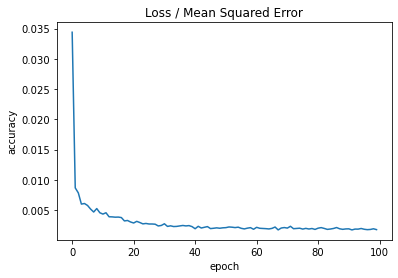

In [35]:

# plot loss during training
print(history.history.keys())
plt.title('Loss / Mean Squared Error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.show()

In [36]:
model.save('Opening_predictor.h5')

In [37]:
#now we will use testing data for predicion purpose 30% data is tetsing data

In [38]:
data_testing.head()

,Open
2158,47.974998
2159,47.575001
2160,49.782501
2161,50.145000
2162,51.757500


In [39]:
#for predicting the values of testing data--> 2158th day 
# we need the mean of previous 100 days

data_training.tail(100) #100 previous data from 2158 index position

,Open
2058,43.735001
2059,43.869999
2060,44.490002
2061,45.072498
2062,45.647499
...,...
2153,47.669998
2154,48.112499
2155,48.264999
2156,48.652500


In [40]:
past_100_days = data_training.tail(100)

In [41]:
final_df = past_100_days.append(data_testing,ignore_index = True) 
#last 100 days of data_testing and data_trainning are appended in final_df

In [42]:
final_df.head()  #this is the testing data

,Open
0,43.735001
1,43.869999
2,44.490002
3,45.072498
4,45.647499


In [43]:
# new again we need to scale the testing data, we need to apply MInMax
# Scaler because this data is not sacled down to 0-1

In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05278413],
       [0.05370477],
       [0.05793298],
       ...,
       [0.95949124],
       [0.9721758 ],
       [0.9673338 ]])

In [45]:
input_data.shape  #1 means for 1 coulumn i.e. closing price column

(1026, 1)

In [46]:
x_test = []
y_test = []

#gaain define the step size as 100
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])  #oth coulmn i.e. closing price column

In [47]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [48]:
x_test.shape

(926, 100, 1)

In [49]:
y_test.shape

(926,)

In [50]:
#making predictions
model = load_model('Opening_predictor.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [51]:
y_predicted = model.predict(x_test)

In [52]:
y_predicted.shape

(926, 1)

In [53]:
y_test

array([8.16994514e-02, 7.89716054e-02, 9.40259947e-02, 9.64981140e-02,
       1.07494801e-01, 1.09148569e-01, 1.11399067e-01, 1.05823993e-01,
       1.11757085e-01, 1.08057425e-01, 1.11382002e-01, 1.12831188e-01,
       1.11228566e-01, 1.15541995e-01, 1.18423303e-01, 1.26368206e-01,
       1.24151813e-01, 1.19548552e-01, 1.20486233e-01, 1.23810835e-01,
       1.24748517e-01, 1.27919657e-01, 1.29863258e-01, 1.35148500e-01,
       1.40706508e-01, 1.43945860e-01, 1.44934713e-01, 1.40229135e-01,
       1.32761631e-01, 1.31227194e-01, 1.26214744e-01, 1.38029808e-01,
       1.35608834e-01, 1.39410783e-01, 1.33273085e-01, 1.25839661e-01,
       1.27050161e-01, 1.30016720e-01, 1.30937361e-01, 1.24185919e-01,
       1.29181303e-01, 1.31312444e-01, 1.36120313e-01, 1.37774055e-01,
       1.43161588e-01, 1.41968154e-01, 1.46741917e-01, 1.47986496e-01,
       1.43178654e-01, 1.33375401e-01, 1.35813415e-01, 1.38916370e-01,
       1.20264612e-01, 1.30323591e-01, 1.31585237e-01, 1.27783261e-01,
      

In [54]:
y_predicted

array([[0.15058944],
       [0.15110321],
       [0.15157571],
       [0.15206149],
       [0.15263367],
       [0.15339328],
       [0.15440936],
       [0.15570548],
       [0.15722576],
       [0.15892659],
       [0.16073449],
       [0.1625885 ],
       [0.16444339],
       [0.16624242],
       [0.16797192],
       [0.16964467],
       [0.17132555],
       [0.17303102],
       [0.17471078],
       [0.17632072],
       [0.17783403],
       [0.1792623 ],
       [0.18063334],
       [0.18197607],
       [0.1833429 ],
       [0.18480116],
       [0.18639955],
       [0.18814664],
       [0.1899715 ],
       [0.191728  ],
       [0.19329064],
       [0.19454102],
       [0.1955382 ],
       [0.19633374],
       [0.19701011],
       [0.1975692 ],
       [0.19794074],
       [0.19810197],
       [0.19809288],
       [0.19797137],
       [0.1977238 ],
       [0.19739902],
       [0.19706261],
       [0.19680497],
       [0.19669119],
       [0.19679329],
       [0.19711912],
       [0.197

In [55]:
#now for comparing y+predicted and y_test we need to again scale them up 
#for that we need to find the scaling facot by which we need to scale them up

In [56]:
scaler.scale_  #this is the scaleing factor, now we need to divide y_predicted and 
#y_test data by this factor..

array([0.00681965])

In [57]:

scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [58]:
y_predicted

array([[ 22.055693],
       [ 22.130941],
       [ 22.200146],
       [ 22.271294],
       [ 22.355097],
       [ 22.46635 ],
       [ 22.61517 ],
       [ 22.805002],
       [ 23.027664],
       [ 23.276773],
       [ 23.541561],
       [ 23.813107],
       [ 24.084776],
       [ 24.348267],
       [ 24.601574],
       [ 24.84657 ],
       [ 25.092754],
       [ 25.34254 ],
       [ 25.588564],
       [ 25.824358],
       [ 26.046003],
       [ 26.25519 ],
       [ 26.455996],
       [ 26.652655],
       [ 26.852844],
       [ 27.066425],
       [ 27.30053 ],
       [ 27.556412],
       [ 27.823687],
       [ 28.080946],
       [ 28.309814],
       [ 28.492949],
       [ 28.638996],
       [ 28.755514],
       [ 28.854578],
       [ 28.936464],
       [ 28.99088 ],
       [ 29.014494],
       [ 29.013163],
       [ 28.995365],
       [ 28.959106],
       [ 28.911537],
       [ 28.862267],
       [ 28.824532],
       [ 28.807867],
       [ 28.82282 ],
       [ 28.870543],
       [ 28.9

In [59]:
y_test

array([1.19658994e+01, 1.15663724e+01, 1.37712747e+01, 1.41333473e+01,
       1.57439487e+01, 1.59861636e+01, 1.63157770e+01, 1.54992381e+01,
       1.63682131e+01, 1.58263520e+01, 1.63132775e+01, 1.65255289e+01,
       1.62908049e+01, 1.69225601e+01, 1.73445635e+01, 1.85081932e+01,
       1.81835750e+01, 1.75093702e+01, 1.76467053e+01, 1.81336346e+01,
       1.82709697e+01, 1.87354226e+01, 1.90200870e+01, 1.97941763e+01,
       2.06082157e+01, 2.10826589e+01, 2.12274887e+01, 2.05382984e+01,
       1.94445898e+01, 1.92198523e+01, 1.84857168e+01, 2.02161797e+01,
       1.98615979e+01, 2.04184407e+01, 1.95194985e+01, 1.84307812e+01,
       1.86080740e+01, 1.90425634e+01, 1.91774028e+01, 1.81885701e+01,
       1.89202062e+01, 1.92323384e+01, 1.99365104e+01, 2.01787215e+01,
       2.09677926e+01, 2.07929994e+01, 2.14921762e+01, 2.16744604e+01,
       2.09702921e+01, 1.95344840e+01, 1.98915614e+01, 2.03460277e+01,
       1.76142461e+01, 1.90875086e+01, 1.92722922e+01, 1.87154456e+01,
      

In [60]:
#now plotting them to get the analysis

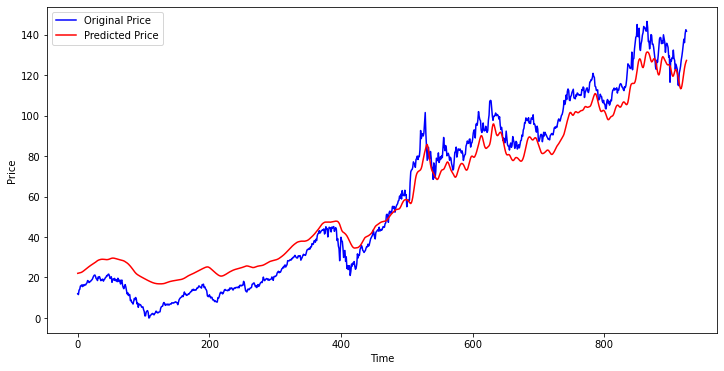

In [61]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


In [63]:
print(train_predict)

[[0.1319563 ]
 [0.13154447]
 [0.13113862]
 ...
 [0.8987113 ]
 [0.90029514]
 [0.90316117]]


In [64]:
print(test_predict)

[[0.15058944]
 [0.15110321]
 [0.15157571]
 [0.15206149]
 [0.15263367]
 [0.15339328]
 [0.15440936]
 [0.15570548]
 [0.15722576]
 [0.15892659]
 [0.16073449]
 [0.1625885 ]
 [0.16444339]
 [0.16624242]
 [0.16797192]
 [0.16964467]
 [0.17132555]
 [0.17303102]
 [0.17471078]
 [0.17632072]
 [0.17783403]
 [0.1792623 ]
 [0.18063334]
 [0.18197607]
 [0.1833429 ]
 [0.18480116]
 [0.18639955]
 [0.18814664]
 [0.1899715 ]
 [0.191728  ]
 [0.19329064]
 [0.19454102]
 [0.1955382 ]
 [0.19633374]
 [0.19701011]
 [0.1975692 ]
 [0.19794074]
 [0.19810197]
 [0.19809288]
 [0.19797137]
 [0.1977238 ]
 [0.19739902]
 [0.19706261]
 [0.19680497]
 [0.19669119]
 [0.19679329]
 [0.19711912]
 [0.19768488]
 [0.19848153]
 [0.19942343]
 [0.20033082]
 [0.20110002]
 [0.20171174]
 [0.2019935 ]
 [0.20195693]
 [0.20167753]
 [0.20120528]
 [0.20065242]
 [0.20003217]
 [0.19936115]
 [0.19869037]
 [0.19799481]
 [0.19737169]
 [0.19680844]
 [0.19625914]
 [0.19574901]
 [0.1951719 ]
 [0.19455796]
 [0.19398157]
 [0.19334462]
 [0.19250363]
 [0.19

In [65]:
#Tenssform them back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [66]:
print(train_predict)

[[ 55.34441 ]
 [ 55.284023]
 [ 55.224514]
 ...
 [167.77753 ]
 [168.00978 ]
 [168.43004 ]]


In [67]:
print(test_predict)

[[ 58.076683]
 [ 58.15202 ]
 [ 58.221306]
 [ 58.292538]
 [ 58.37644 ]
 [ 58.487823]
 [ 58.636814]
 [ 58.826874]
 [ 59.0498  ]
 [ 59.2992  ]
 [ 59.5643  ]
 [ 59.836166]
 [ 60.108154]
 [ 60.37196 ]
 [ 60.62556 ]
 [ 60.870846]
 [ 61.11732 ]
 [ 61.3674  ]
 [ 61.613716]
 [ 61.84979 ]
 [ 62.071693]
 [ 62.281124]
 [ 62.48217 ]
 [ 62.679058]
 [ 62.879486]
 [ 63.09332 ]
 [ 63.327698]
 [ 63.58388 ]
 [ 63.851475]
 [ 64.10904 ]
 [ 64.33817 ]
 [ 64.52152 ]
 [ 64.66775 ]
 [ 64.7844  ]
 [ 64.883575]
 [ 64.96556 ]
 [ 65.02004 ]
 [ 65.043686]
 [ 65.04235 ]
 [ 65.024536]
 [ 64.98823 ]
 [ 64.940605]
 [ 64.89127 ]
 [ 64.8535  ]
 [ 64.836815]
 [ 64.85178 ]
 [ 64.89957 ]
 [ 64.98252 ]
 [ 65.09934 ]
 [ 65.23746 ]
 [ 65.370514]
 [ 65.4833  ]
 [ 65.573006]
 [ 65.61432 ]
 [ 65.608955]
 [ 65.567986]
 [ 65.49874 ]
 [ 65.41767 ]
 [ 65.32672 ]
 [ 65.228325]
 [ 65.12996 ]
 [ 65.02797 ]
 [ 64.9366  ]
 [ 64.854004]
 [ 64.77346 ]
 [ 64.698654]
 [ 64.61403 ]
 [ 64.52401 ]
 [ 64.43948 ]
 [ 64.34609 ]
 [ 64.22277 ]
 [ 64.

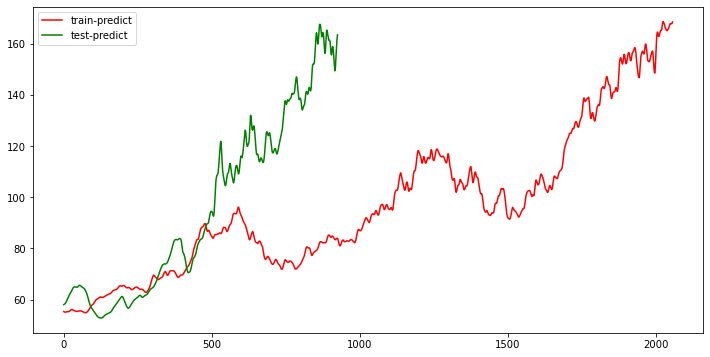

In [68]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(train_predict, 'r',label = 'train-predict')
plt.plot(test_predict, 'g',label = 'test-predict')
plt.legend()

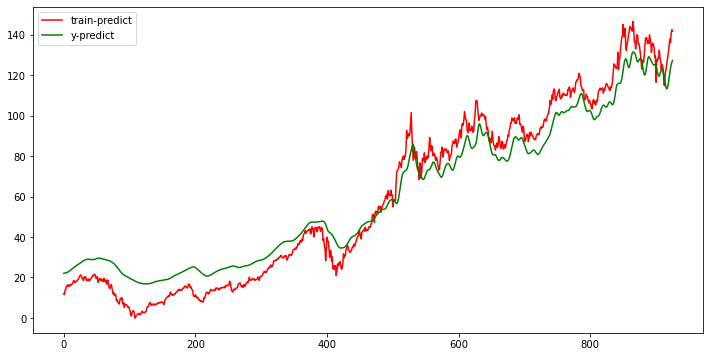

In [69]:
#plot beetween train_predict and test_predict
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r',label = 'train-predict')
plt.plot(y_predicted,'g',label = 'y-predict')
plt.legend()

In [70]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #it is the RMSE for training dataset

100.40473579441088

In [71]:
math.sqrt(mean_squared_error(y_test,test_predict)) #it is the RMSE for training dataset

37.67384556482111

In [72]:
# testPredict = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(score)
# Result (MSE adn RMSE)
TM_MSE = score
TM_RMSE = math.sqrt(score)

print('Mean squared error (MSE)', TM_MSE)
print('Root Mean squared error (RMSE)', TM_RMSE)



acc = score//100
print('Test accuracy: ',acc, '%')

29/29 [==============================] - 2s 52ms/step - loss: 5348.6123
5348.6123046875
Mean squared error (MSE) 5348.6123046875
Root Mean squared error (RMSE) 73.13420748656199
Test accuracy:  53.0 %
